# Part 1: Regression on California Test Scores
## 1. Find the url for the California Test Score Data Set from the following website:
https://vincentarelbundock.github.io/Rdatasets/datasets.html
Read through the "DOC" file to understand the variables in the dataset, then use the following url to import the data.  
https://vincentarelbundock.github.io/Rdatasets/csv/Ecdat/Caschool.csv
 
Links to an external site.
The target data (i.e. the dependent variable) is named "testscr".

In [224]:
import pandas as pd
import numpy as np
df = pd.read_csv("https://vincentarelbundock.github.io/Rdatasets/csv/Ecdat/Caschool.csv")

### 1.1 Visualize the univariate distribution of the target feature and each of the three continuous explanatory variables that you think are likely to have a relationship with the target feature.   

Below is the visualization of the dependent variable 'test score' as a histogram. 

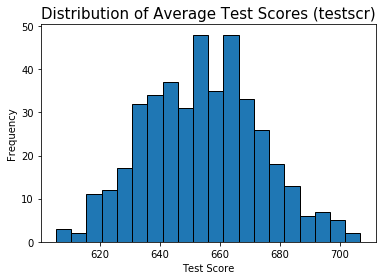

In [225]:
import matplotlib.pyplot as plt
plt.title('Distribution of Average Test Scores (testscr)', fontsize = 15)
plt.xlabel('Test Score', fontsize = 10)
plt.ylabel('Frequency', fontsize = 10)
plt.hist(df['testscr'], bins = 20, ec='black')
plt.show()

### After analysing the plot above, I chose three explanatory variables: 1) percent of English learners (elpct) 2) percent qualifying for reduced-price lunch (mealpct) and 3) district average income (avginc) since they appeared to have a relationship with the dependent variable.

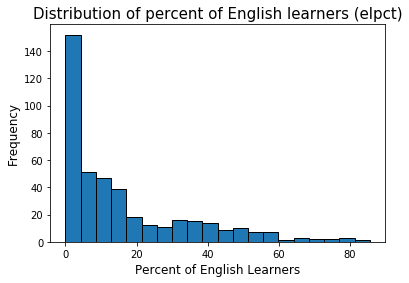

In [226]:
plt.title('Distribution of percent of English learners (elpct)', fontsize = 15)
plt.xlabel('Percent of English Learners', fontsize = 12)
plt.ylabel('Frequency', fontsize = 12)
plt.hist(df['elpct'], bins = 20, ec='black')
plt.show()

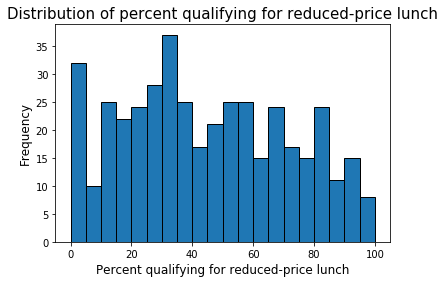

In [227]:
plt.title('Distribution of percent qualifying for reduced-price lunch', fontsize = 15)
plt.xlabel('Percent qualifying for reduced-price lunch', fontsize = 12)
plt.ylabel('Frequency', fontsize = 12)
plt.hist(df['mealpct'], bins = 20, ec='black')
plt.show()

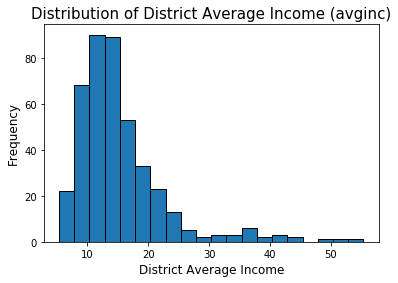

In [228]:
plt.title('Distribution of District Average Income (avginc)', fontsize = 15)
plt.xlabel('District Average Income', fontsize = 12)
plt.ylabel('Frequency', fontsize = 12)
plt.hist(df['avginc'], bins = 20, ec='black')
plt.show()

### 1.2 Visualize the dependency of the target on each feature from 1.1.

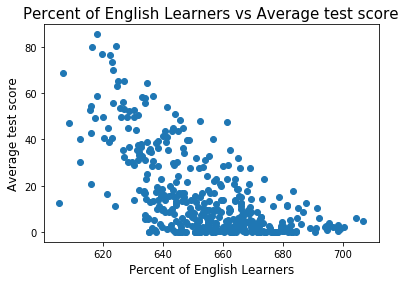

In [229]:
plt.scatter(df['testscr'], df['elpct'])
plt.title("Percent of English Learners vs Average test score", fontsize = 15)
plt.xlabel("Percent of English Learners", fontsize = 12)
plt.ylabel("Average test score", fontsize = 12)
plt.show()


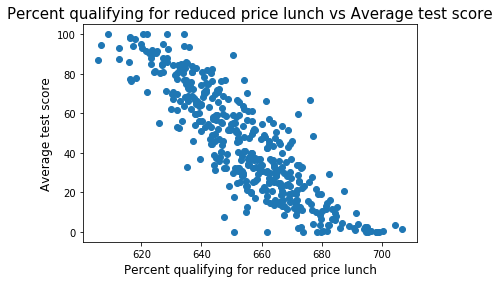

In [230]:
plt.scatter(df['testscr'], df['mealpct'])
plt.title("Percent qualifying for reduced price lunch vs Average test score", fontsize = 15)
plt.xlabel("Percent qualifying for reduced price lunch", fontsize = 12)
plt.ylabel("Average test score", fontsize = 12)
plt.show()

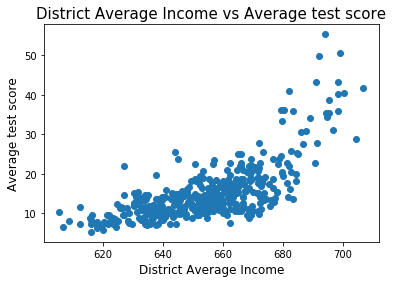

In [231]:
plt.scatter(df['testscr'], df['avginc'])
plt.title("District Average Income vs Average test score", fontsize = 15)
plt.xlabel("District Average Income", fontsize = 12)
plt.ylabel("Average test score", fontsize = 12)
plt.show()

### 1.3 Split data in training and test set. Build models that evaluate the relationship between all available X variables in the California test dataset and the target variable. Evaluate KNN for regression, Linear Regression (OLS), Ridge, and Lasso using cross-validation with the default parameters. Does scaling the data with the StandardScaler help?

## Munging:
First, I decided to remove the features: mathscr or math score and readscr or reading score because they are contained within the variable testscr. I also removed other qualitative variables.

In [232]:
df.head()

,Unnamed: 0,distcod,county,district,grspan,enrltot,teachers,calwpct,mealpct,computer,testscr,compstu,expnstu,str,avginc,elpct,readscr,mathscr
0,1,75119,Alameda,Sunol Glen Unified,KK-08,195,10.900000,0.510200,2.040800,67,690.799988,0.343590,6384.911133,17.889910,22.690001,0.000000,691.599976,690.000000
1,2,61499,Butte,Manzanita Elementary,KK-08,240,11.150000,15.416700,47.916698,101,661.200012,0.420833,5099.380859,21.524664,9.824000,4.583333,660.500000,661.900024
2,3,61549,Butte,Thermalito Union Elementary,KK-08,1550,82.900002,55.032299,76.322601,169,643.599976,0.109032,5501.954590,18.697226,8.978000,30.000002,636.299988,650.900024
3,4,61457,Butte,Golden Feather Union Elementary,KK-08,243,14.000000,36.475399,77.049202,85,647.700012,0.349794,7101.831055,17.357143,8.978000,0.000000,651.900024,643.500000
4,5,61523,Butte,Palermo Union Elementary,KK-08,1335,71.500000,33.108601,78.427002,171,640.849976,0.128090,5235.987793,18.671329,9.080333,13.857677,641.799988,639.900024


In [233]:
df = df.loc[:, df.columns != 'readscr']
df = df.loc[:, df.columns != 'mathscr']
df = df.loc[:, df.columns != 'distcod']
df = df.loc[:, df.columns != 'grspan']

df = df.loc[:, df.columns != 'county']
df = df.loc[:, df.columns != 'district']
df.head()

,Unnamed: 0,enrltot,teachers,calwpct,mealpct,computer,testscr,compstu,expnstu,str,avginc,elpct
0,1,195,10.900000,0.510200,2.040800,67,690.799988,0.343590,6384.911133,17.889910,22.690001,0.000000
1,2,240,11.150000,15.416700,47.916698,101,661.200012,0.420833,5099.380859,21.524664,9.824000,4.583333
2,3,1550,82.900002,55.032299,76.322601,169,643.599976,0.109032,5501.954590,18.697226,8.978000,30.000002
3,4,243,14.000000,36.475399,77.049202,85,647.700012,0.349794,7101.831055,17.357143,8.978000,0.000000
4,5,1335,71.500000,33.108601,78.427002,171,640.849976,0.128090,5235.987793,18.671329,9.080333,13.857677


In [234]:
df= df.iloc[:, 1:]

In [235]:
df.head()

,enrltot,teachers,calwpct,mealpct,computer,testscr,compstu,expnstu,str,avginc,elpct
0,195,10.900000,0.510200,2.040800,67,690.799988,0.343590,6384.911133,17.889910,22.690001,0.000000
1,240,11.150000,15.416700,47.916698,101,661.200012,0.420833,5099.380859,21.524664,9.824000,4.583333
2,1550,82.900002,55.032299,76.322601,169,643.599976,0.109032,5501.954590,18.697226,8.978000,30.000002
3,243,14.000000,36.475399,77.049202,85,647.700012,0.349794,7101.831055,17.357143,8.978000,0.000000
4,1335,71.500000,33.108601,78.427002,171,640.849976,0.128090,5235.987793,18.671329,9.080333,13.857677


In [236]:
y = df['testscr']
X = df.loc[:, df.columns != 'testscr']

### Split dataset into training and testing sets

In [237]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y)
X_train.head()

,enrltot,teachers,calwpct,mealpct,computer,compstu,expnstu,str,avginc,elpct
7,888,42.500000,18.806299,100.000000,66,0.074324,4565.746094,20.894117,8.174000,46.959461
262,2325,115.300003,2.881700,15.655900,302,0.129892,4890.986816,20.164787,21.110500,22.709679
165,797,38.000000,7.026300,35.759102,60,0.075282,4674.298828,20.973684,16.292999,3.262233
101,2141,105.820000,26.496500,65.382797,134,0.062588,5279.354004,20.232470,12.077000,11.349836
177,474,26.340000,21.995899,54.989799,61,0.128692,5634.730957,17.995443,10.521000,0.000000


# Preprocessing

I chose to scale the dataset because there is a high degree of variation in the ranges of the different variables. Running models without scaling the dataset produces negative R^2 in cross validation indicating that performance is worse than the horizontal mean line.

In [238]:
from sklearn import preprocessing
scaler = preprocessing.StandardScaler().fit(X_train)
X_train_scaled = pd.DataFrame(preprocessing.scale(X_train), columns=['enrltot','teachers','calwpct','mealpct', 'computer', 'compstu', 'expnstu', 'str', 'avginc', 'elpct'])
X_test_scaled = pd.DataFrame(scaler.transform(X_test), columns=['enrltot','teachers','calwpct','mealpct', 'computer', 'compstu', 'expnstu', 'str', 'avginc', 'elpct'])
X_train_scaled.head()
y_train_scaled = pd.DataFrame(preprocessing.scale(y_train), columns=['testscr'])
y_test_scaled = pd.DataFrame(preprocessing.scale(y_test), columns=['testscr'])

X_train_scaled.head()

,enrltot,teachers,calwpct,mealpct,computer,compstu,expnstu,str,avginc,elpct
0,-0.405596,-0.419576,0.558741,2.090320,-0.501904,-0.904652,-1.154914,0.645896,-0.982510,1.760285
1,-0.041304,-0.034769,-0.912175,-1.049095,0.041885,-0.089229,-0.654112,0.276445,0.777210,0.411738
2,-0.428665,-0.443362,-0.529349,-0.300823,-0.515729,-0.890594,-0.987765,0.686201,0.121898,-0.669749
3,-0.087950,-0.084878,1.269065,0.801815,-0.345219,-1.076880,-0.056108,0.310730,-0.451595,-0.219991
4,-0.510549,-0.504994,0.853356,0.414972,-0.513425,-0.106846,0.491097,-0.822461,-0.663253,-0.851164


## Cross Validation: K-Neighbors Regression:

I decided to carry out repeated k-fold cross validation (with 10 folds, and 10 repeats) in order to find out the accuracy of K-Neighbors Regression with 5 neighbors for the test scores data. The scoring method chosen is R^2. (default)

K-Neighbors Regression:
Range of cross-validation scores: 
0.5843390937081475
Mean of cross validation scores: 
0.6907065469934592


Text(0.5,0,'R^2')

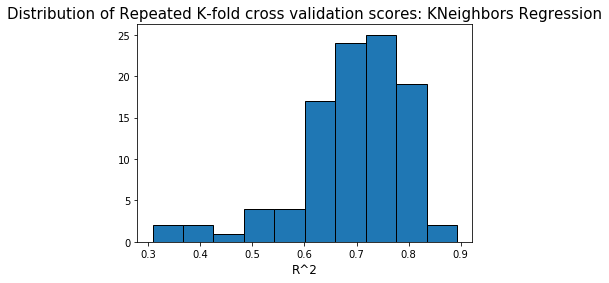

In [239]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedKFold
from sklearn.model_selection import KFold
from sklearn.model_selection import StratifiedKFold

rkf = RepeatedKFold(n_splits=10, n_repeats=10)

rkf_scores_knn = cross_val_score(KNeighborsRegressor(n_neighbors=5), X_train_scaled, y_train_scaled, cv=rkf)
print("K-Neighbors Regression:")
print("Range of cross-validation scores: \n{}".format(max(rkf_scores_knn) - min(rkf_scores_knn)))
print("Mean of cross validation scores: \n{}".format(np.mean(rkf_scores_knn)))
plt.hist(rkf_scores_knn, ec='black', bins=10)
plt.title("Distribution of Repeated K-fold cross validation scores: KNeighbors Regression", fontsize=15)
plt.xlabel("R^2", fontsize=12)


## Cross Validation: Linear Regression

I decided to carry out repeated k-fold cross validation (10 folds, 10 repeats) in order to find out the accuracy of Linear Regression for the test scores data. The scoring method chosen is R^2. (default)

Linear Regression:
Range of cross-validation scores: 
0.4488352309060401
Mean of cross validation scores: 
0.7619226799385862


Text(0.5,0,'R^2')

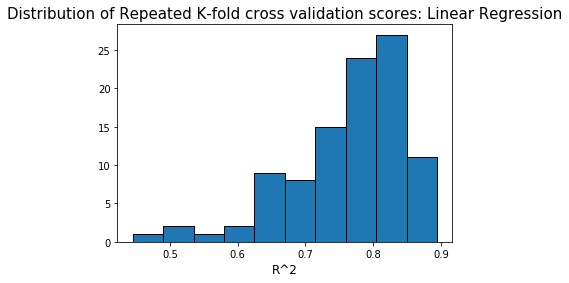

In [240]:
from sklearn.linear_model import LinearRegression

rkf_scores_linreg = cross_val_score(LinearRegression(), X_train_scaled, y_train_scaled, cv=rkf)
print("Linear Regression:")
print("Range of cross-validation scores: \n{}".format(max(rkf_scores_linreg) - min(rkf_scores_linreg)))
print("Mean of cross validation scores: \n{}".format(np.mean(rkf_scores_linreg)))
plt.hist(rkf_scores_linreg, ec='black', bins=10)
plt.title("Distribution of Repeated K-fold cross validation scores: Linear Regression", fontsize=15)
plt.xlabel("R^2", fontsize=12)

## Cross Validation: Ridge Regression

I decided to carry out repeated k-fold cross validation (10 folds, 10 repeats) in order to find out the accuracy of Ridge Regression (default alpha=1.0) for the test scores data. The scoring method chosen is R^2. (default)

Ridge Regression:
Range of cross-validation scores: 
0.44381826773096333
Mean of cross validation scores: 
0.7627506380724088


Text(0.5,0,'R^2')

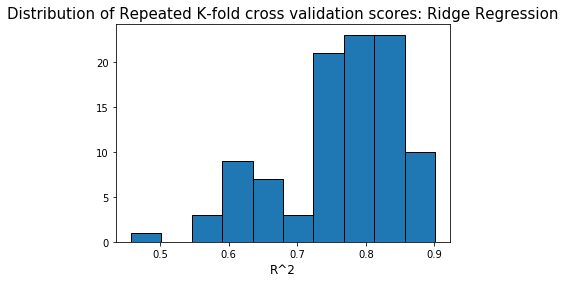

In [241]:
from sklearn.linear_model import Ridge

rkf_scores_ridge = cross_val_score(Ridge(), X_train_scaled, y_train_scaled, cv=rkf)
print("Ridge Regression:")
print("Range of cross-validation scores: \n{}".format(max(rkf_scores_ridge) - min(rkf_scores_ridge)))
print("Mean of cross validation scores: \n{}".format(np.mean(rkf_scores_ridge)))
plt.hist(rkf_scores_ridge, ec='black', bins=10)
plt.title("Distribution of Repeated K-fold cross validation scores: Ridge Regression", fontsize=15)
plt.xlabel("R^2", fontsize=12)


## Cross Validation: Lasso Regression

I decided to carry out repeated k-fold cross validation (10 folds, 10 repeats) in order to find out the accuracy of Lasso Regression (default alpha=1.0) for the test scores data. The scoring method chosen is R^2. (default)

Lasso Regression:
Range of cross-validation scores: 
0.32721165021563126
Mean of cross validation scores: 
-0.039463208196630815


Text(0.5,0,'R^2')

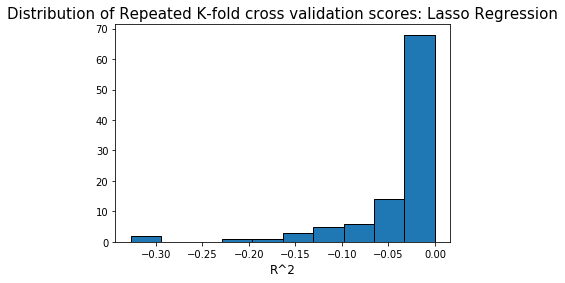

In [242]:
from sklearn.linear_model import Lasso

rkf_scores_lasso = cross_val_score(Lasso(), X_train_scaled, y_train_scaled, cv=rkf)
print("Lasso Regression:")
print("Range of cross-validation scores: \n{}".format(max(rkf_scores_lasso) - min(rkf_scores_lasso)))
print("Mean of cross validation scores: \n{}".format(np.mean(rkf_scores_lasso)))
plt.hist(rkf_scores_lasso, ec='black', bins=10)
plt.title("Distribution of Repeated K-fold cross validation scores: Lasso Regression", fontsize=15)
plt.xlabel("R^2", fontsize=12)


Lasso regression performs poorly on the model with the default alpha value.

## 1.4 Tune the parameters of the models where possible using GridSearchCV. Do the results improve?

### GridSearch CV: Finding the best n_neighbors for K-Nearest Neighbors Regression


In [243]:
from sklearn.model_selection import GridSearchCV
import numpy as np


#create dictionary data object with keys equal to parameter name 'n_neighbors' 
#for knn model and values equal to range of k values to create models for

param_grid = {'n_neighbors': np.arange(1, 15, 1)} #np.arange creates sequence of numbers for each k value

grid = GridSearchCV(KNeighborsRegressor(), param_grid=param_grid, cv=10)

#use meta model methods to fit score and predict model:
grid.fit(X_train_scaled, y_train_scaled)

print("GridSearchCV - K-Nearest-Neighbors Regression:")
#extract best score and parameter by calling objects "best_score_" and "best_params_"
print("Best mean cross-validation score: {:.3f}".format(grid.best_score_))
print("Best parameters: {}".format(grid.best_params_))
print("Test-set score: {:.3f}".format(grid.score(X_test_scaled, y_test_scaled)))


GridSearchCV - K-Nearest-Neighbors Regression:
Best mean cross-validation score: 0.722
Best parameters: {'n_neighbors': 10}
Test-set score: 0.783


### Test set score for Linear Regression 
Since linear regression has no parameters to tune, here is the calculation of the test-set score.

In [244]:
linreg = LinearRegression().fit(X_train_scaled, y_train_scaled)
print("Test set score for Linear Regression: \n{}".format(linreg.score(X_test_scaled, y_test_scaled)))

Test set score for Linear Regression: 
0.8433667021489919


### GridSearch CV: Finding the best alpha for Ridge Regression

In [245]:


param_grid = {'alpha': np.arange(18, 22, 0.1)} 

grid = GridSearchCV(Ridge(), param_grid=param_grid, cv=10)

grid.fit(X_train_scaled, y_train_scaled)

print("GridSearchCV - Ridge Regression:")
print("Best mean cross-validation score: {:.3f}".format(grid.best_score_))
print("Best parameters: {}".format(grid.best_params_))
print("Test-set score: {:.3f}".format(grid.score(X_test_scaled, y_test_scaled)))

GridSearchCV - Ridge Regression:
Best mean cross-validation score: 0.774
Best parameters: {'alpha': 18.0}
Test-set score: 0.842


Re-performing Cross-validation on Ridge regression in order to find out range of cross-validation scores for chosen alpha:

Ridge Regression:
Range of cross-validation scores: 
0.37059912272913276
Mean of cross validation scores: 
0.7669884881147826


Text(0.5,0,'R^2')

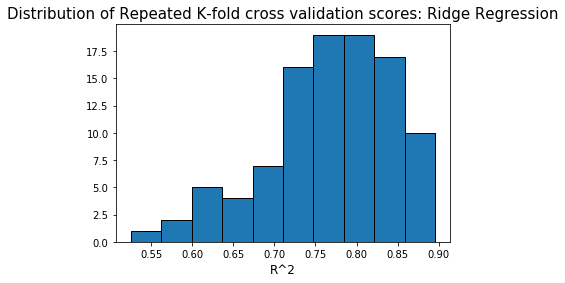

In [246]:
rkf_scores_ridge = cross_val_score(Ridge(19.6), X_train_scaled, y_train_scaled, cv=rkf)
print("Ridge Regression:")
print("Range of cross-validation scores: \n{}".format(max(rkf_scores_ridge) - min(rkf_scores_ridge)))
print("Mean of cross validation scores: \n{}".format(np.mean(rkf_scores_ridge)))
plt.hist(rkf_scores_ridge, ec='black', bins=10)
plt.title("Distribution of Repeated K-fold cross validation scores: Ridge Regression", fontsize=15)
plt.xlabel("R^2", fontsize=12)

### GridSearch CV: Finding the best alpha for Lasso Regression

In [247]:


param_grid = {'alpha': np.arange(0.001, 0.003, 0.0001)} #np.arange creates sequence of numbers for each k value

grid = GridSearchCV(Lasso(max_iter = 1000), param_grid=param_grid, cv=10)

grid.fit(X_train_scaled, y_train_scaled)

print("GridSearchCV - Lasso Regression:")
print("Best mean cross-validation score: {:.3f}".format(grid.best_score_))
print("Best parameters: {}".format(grid.best_params_))
print("Test-set score: {:.3f}".format(grid.score(X_test_scaled, y_test_scaled)))

GridSearchCV - Lasso Regression:
Best mean cross-validation score: 0.773
Best parameters: {'alpha': 0.0029000000000000007}
Test-set score: 0.844


Re-performing Cross-validation on Lasso regression in order to find out range of cross-validation scores for chosen alpha:

Lasso Regression:
Range of cross-validation scores: 
0.4198799859317917
Mean of cross validation scores: 
0.7613693728164843


Text(0.5,0,'R^2')

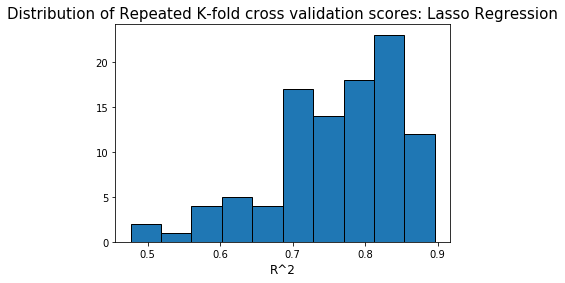

In [248]:
rkf_scores_lasso = cross_val_score(Lasso(alpha=0.001), X_train_scaled, y_train_scaled, cv=rkf)
print("Lasso Regression:")
print("Range of cross-validation scores: \n{}".format(max(rkf_scores_lasso) - min(rkf_scores_lasso)))
print("Mean of cross validation scores: \n{}".format(np.mean(rkf_scores_lasso)))
plt.hist(rkf_scores_lasso, ec='black', bins=10)
plt.title("Distribution of Repeated K-fold cross validation scores: Lasso Regression", fontsize=15)
plt.xlabel("R^2", fontsize=12)

Test-set accuracy and mean cross-validation scores improve substantially for Ridge, Lasso and KNN Regression after tuning the hyperparameters with GridSearchCV. All three models are at a similar level of accuracy, though linear regression has a greater variation in cross-validation results. 

## 1.5 Compare the coefficients of your two best linear models (not knn), do they agree on which features are important?

The best two models here (not knn) are Ridge regression and Lasso regression, based on the cross validation scores and test-set prediction accuracy. This is because the Linear regression model displays a larger variance in R^2 during cross validation than Ridge regression and Lasso regression. 

## Coefficients: Ridge Regression

In [249]:
ridge = Ridge(alpha = 19.6).fit(X_train_scaled, y_train_scaled)
print("Training set score: {:.2f}".format(ridge.score(X_train_scaled, y_train_scaled)))
print("Test set score: {:.2f}".format(ridge.score(X_test_scaled, y_test_scaled)))
print("Number of features used: {}".format(np.sum(ridge.coef_ != 0))) 

print("lasso.coef_: {}".format(ridge.coef_))
print("lasso.intercept_: {}".format(ridge.intercept_))

Training set score: 0.79
Test set score: 0.84
Number of features used: 10
lasso.coef_: [[-0.0252712  -0.00780963 -0.09794292 -0.4243996   0.03691891  0.02064651
   0.07034552 -0.01215101  0.25489382 -0.23479474]]
lasso.intercept_: [-3.83925278e-15]


The ridge regression model is not very helpful because it does not indicate the statistical significance of the different predictors, and it does not simplify the model. Based on the closeness to zero, mealpct, avginc and elpct appear to be the most significant variables with coefficients of -0.47204168 (inverse relationship), 0.25130323 (positive relationship) and -0.19965802 (inverse relationship).

## Coefficients: Lasso Regression

In [250]:
lasso = Lasso(alpha = 0.001).fit(X_train_scaled, y_train_scaled)
print("Training set score: {:.2f}".format(lasso.score(X_train_scaled, y_train_scaled)))
print("Test set score: {:.2f}".format(lasso.score(X_test_scaled, y_test_scaled)))
print("Number of features used: {}".format(np.sum(lasso.coef_ != 0))) 

print("lasso.coef_: {}".format(lasso.coef_))
print("lasso.intercept_: {}".format(lasso.intercept_))

Training set score: 0.80
Test set score: 0.84
Number of features used: 9
lasso.coef_: [-0.03931893 -0.         -0.06105801 -0.4964457   0.04109914  0.01795988
  0.07838221 -0.00350446  0.24461175 -0.21615531]
lasso.intercept_: [-3.83946441e-15]


The Lasso regression removes the predictor: teachers or the number of teachers in the school, since it is reduced to zero. The coefficients and results are similar to ridge regression. In the next answer, I will simplify this model to improve interpretability.

## 1.6 Discuss which final model you would choose to predict new data


In [251]:
lasso = Lasso(alpha = 0.1).fit(X_train_scaled, y_train_scaled)
print("Training set score: {:.2f}".format(lasso.score(X_train_scaled, y_train_scaled)))
print("Test set score: {:.2f}".format(lasso.score(X_test_scaled, y_test_scaled)))
print("Number of features used: {}".format(np.sum(lasso.coef_ != 0))) 

print("lasso.coef_: {}".format(lasso.coef_))
print("lasso.intercept_: {}".format(lasso.intercept_))

Training set score: 0.77
Test set score: 0.83
Number of features used: 3
lasso.coef_: [-0.         -0.         -0.         -0.52487375 -0.          0.
  0.         -0.          0.2143989  -0.13308489]
lasso.intercept_: [-3.84859764e-15]


Increasing the alpha to 0.1 results in a small decrease in test score accuracy and training accuracy, but is a much simpler model that is easier to interpret because it is built on only three predictors - the same predictors that the linear regression model identified as significant. Therefore, I consider Lasso Regression with an alpha of 0.1 is the best model because it is simple, has a comparable R^2 to linear regression and its results do not vary as widely as Ridge regression:

Lasso Regression:
Range of cross-validation scores: 
0.4025916483247951
Mean of cross validation scores: 
0.7504775407377743


Text(0.5,0,'R^2')

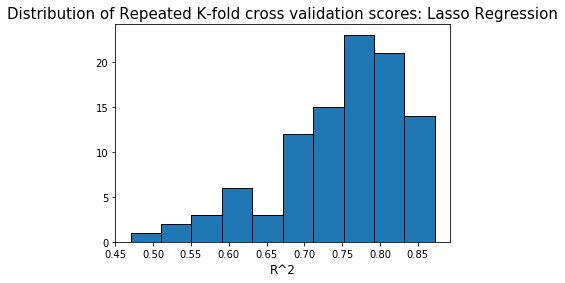

In [252]:
rkf_scores_lasso = cross_val_score(Lasso(alpha=0.1), X_train_scaled, y_train_scaled, cv=rkf)
print("Lasso Regression:")
print("Range of cross-validation scores: \n{}".format(max(rkf_scores_lasso) - min(rkf_scores_lasso)))
print("Mean of cross validation scores: \n{}".format(np.mean(rkf_scores_lasso)))
plt.hist(rkf_scores_lasso, ec='black', bins=10)
plt.title("Distribution of Repeated K-fold cross validation scores: Lasso Regression", fontsize=15)
plt.xlabel("R^2", fontsize=12)

The model also displays the lowest range in cross-validation scores, hinting that there is less of an overfitting problem. 